<a href="https://colab.research.google.com/github/Nazneen-akram/NED-Data-Science-Artificial-Intelligence/blob/main/chapter02_mathematical_building_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

### Example of Artificial Neural Network

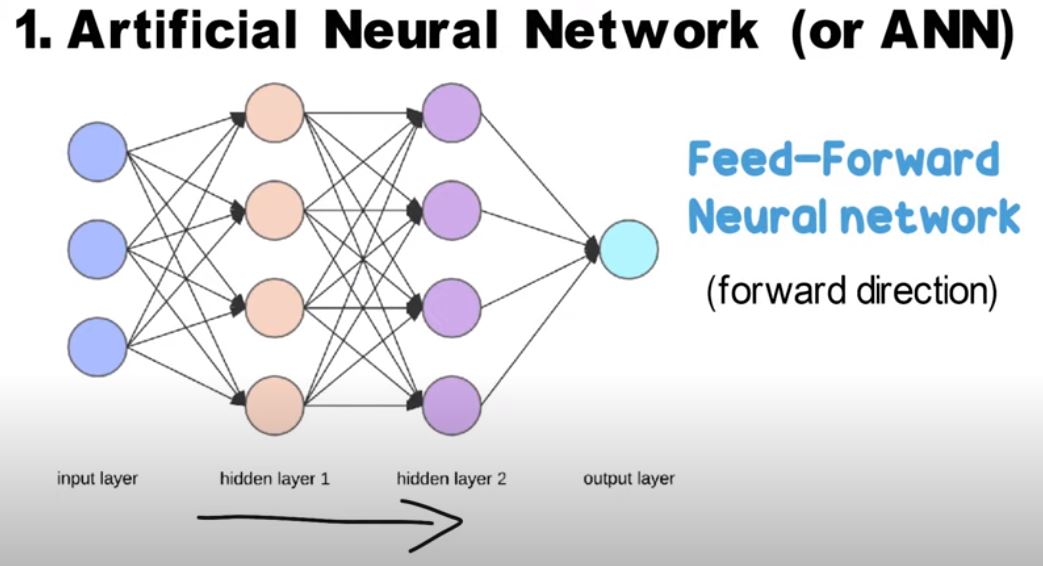

In [16]:
from IPython.display import Image

# specify the image path
image_path = "/content/ANN-image.JPG"

# display the image
Image(filename=image_path)


## A first look at a neural network



**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape # 28 x 28 pixels

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape #10,000 images and 28 x 28 pixels

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

*  The ```compile``` method is used to specify how the model should “learn”
from the data it is given.

* ```optimizer="rmsprop"```: The optimizer determines how the model is updated based on the data it sees and its loss function. “rmsprop” is a type of optimization algorithm that adjusts the learning rate for each of the parameters in your model
```
loss="sparse_categorical_crossentropy"
```
*  type of loss function that is suitable for multi-class classification problems where the classes are mutually exclusive. In other words, each data point belongs to exactly one class.

In [12]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

* ```train_images = train_images.reshape((60000, 28 * 28))``` flatten each image into a single row. From **(60000, 28, 28)** to **(60000,784)**


* ```train_images = train_images.astype("float32") / 255```: This line is normalizing the **train_images** array. The ```astype``` function is used to change the data type of the array to float32. Dividing by 255 scales the pixel intensity values (which are integers ranging from 0 to 255) to be between 0 and 1. This is a common preprocessing step in image processing tasks.

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**


 * ```model.fit(...)```: This line is training the model. The fit method is used to train the model for a fixed number of epochs (iterations on a dataset).

 * this code is training the model on the **train_images** and **train_labels** data for 5 epochs, updating the model weights after every 128 samples

 * ```epochs=5```: This is the number of epochs to train the model. An epoch is one complete pass through the entire training dataset. So epochs=5 means the learning algorithm will work through the entire dataset 5 times.



In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2631 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1061 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0693 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0503 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0374 - accuracy: 0.9890


**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10] # 10 iamges taken
predictions = model.predict(test_digits)
predictions[0]  #1st image probalilities

1/1 [==============================] - 0s 80ms/step


array([6.3024448e-09, 9.7769098e-11, 1.3227201e-06, 5.1872670e-05,
       1.0651504e-11, 5.1910199e-08, 4.5854159e-14, 9.9994636e-01,
       6.3291544e-08, 4.6306255e-07], dtype=float32)

In [ ]:
len(test_digits)

10

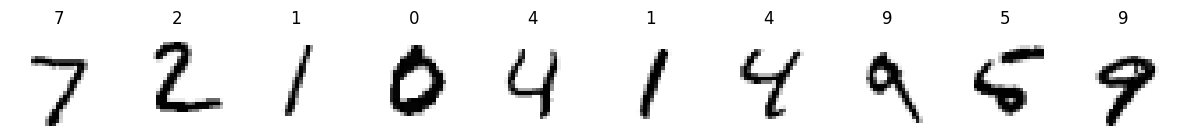

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # Adjust figsize as needed

for idx, img in enumerate(test_digits):
    img_r = img.reshape(28,28)
    axes[idx].imshow(img_r, cmap=plt.cm.binary)
    axes[idx].axis('off')
    pr = np.argmax(predictions[idx])
    axes[idx].set_title(str(pr))
plt.show()


In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9809
test_acc: 0.98089998960495


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

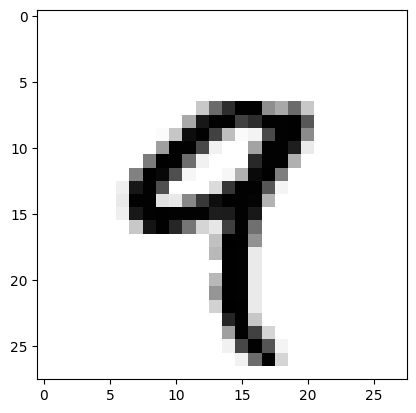

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
def show(img):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

In [ ]:
train_labels[4]

9

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

Vector Operation

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


non vector approach

In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.00 s


### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y.shape

(10,)

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
y.shape

(1, 10)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

single dimensional vectors (vectorized dot product)

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

single dim : non-vactorized naive dot product

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

x is matrix (2 sim), y is vector (1 dim)

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]  # no. of columns in x must equal no. of rows in y
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

Using above function

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

now defining function for naive dot procuct of 2 matrices (both 2 dim)

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))